### (0 баллов) Считываем данные

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [4]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [5]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [7]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [85]:
prediction_linear = model.predict(X_test)
prediction[:10]

array([22.36518057, 34.51804967, 27.49883941, 36.72414659, 33.5980204 ,
       26.09401779, 31.69264939,  7.80037662, 32.02817764, 23.47919644])

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [86]:
from sklearn.metrics import mean_squared_error

def MSE(y_real, y_pred):
    return  np.sum( np.power((y_real - y_pred), 2) ) / y_real.size

In [87]:
print(f'MSE собственной реализации: {MSE(y_test, prediction_linear)}')
print(f'MSE из sklearn: {mean_squared_error(y_test, prediction_linear)}')

MSE собственной реализации: 26.668679267823933
MSE из sklearn: 26.668679267823933


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [88]:
def naive_prediction(X_train, y_train):
    return np.mean(y_train)

naive_predictions = np.array([naive_prediction(X_train, y_train)] * y_test.size)
naive_predictions[:10]

array([22.33758242, 22.33758242, 22.33758242, 22.33758242, 22.33758242,
       22.33758242, 22.33758242, 22.33758242, 22.33758242, 22.33758242])

In [89]:
print(f'MSE модели: {MSE(y_test, prediction_linear)}')
print(f'MSE наивного алгоритма: {MSE(y_test, naive_predictions)}')

MSE модели: 26.668679267823933
MSE наивного алгоритма: 105.26809677338393


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

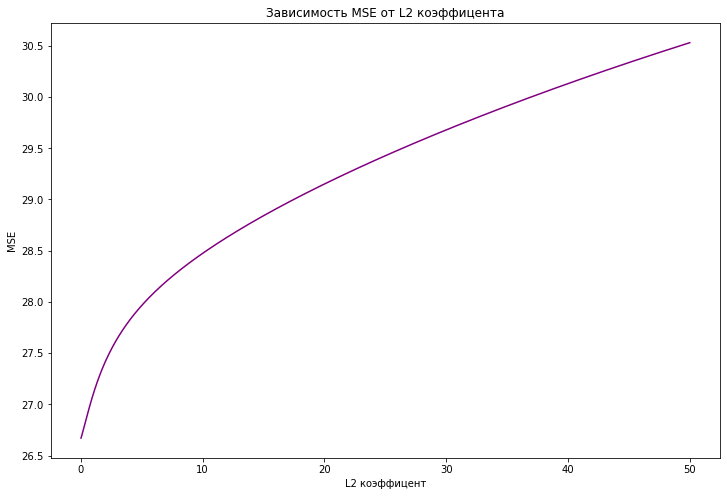

Wall time: 4.45 s


In [94]:
%%time

from sklearn.linear_model import Ridge

mse_results = []
steps = np.linspace(50, 0.01, 5000)  # коэффиценты регуляризации

for l2 in steps:
    ridgeModel = Ridge(alpha=l2).fit(X_train, y_train)
    
    prediction_ridge = ridgeModel.predict(X_test)
    mse_results.append(MSE(y_test, prediction_ridge))
    
plt.figure(figsize=(12, 8))
plt.plot(steps, mse_results, color='purple')
plt.title('Зависимость MSE от L2 коэффицента')
plt.xlabel('L2 коэффицент')
plt.ylabel('MSE')
plt.show()

In [96]:
def calculate_MSE_errors(X_train, X_test, y_train, y_test):
    mse_results = []
    steps = np.linspace(50, 0.01, 5000)  # коэффиценты регуляризации

    for l2 in steps:
        ridgeModel = Ridge(alpha=l2).fit(X_train, y_train)

        prediction_ridge = ridgeModel.predict(X_test)
        mse_results.append(MSE(y_test, prediction_ridge))

    return mse_results

In [106]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
coefs_5splits = []

for test_data, train_data in kf.split(X):
    X_test, X_train = X[test_data], X[train_data]
    y_test, y_train = y[test_data], y[train_data]
    
    coefs_5splits.append( calculate_MSE_errors(X_train, X_test, y_train, y_test) )

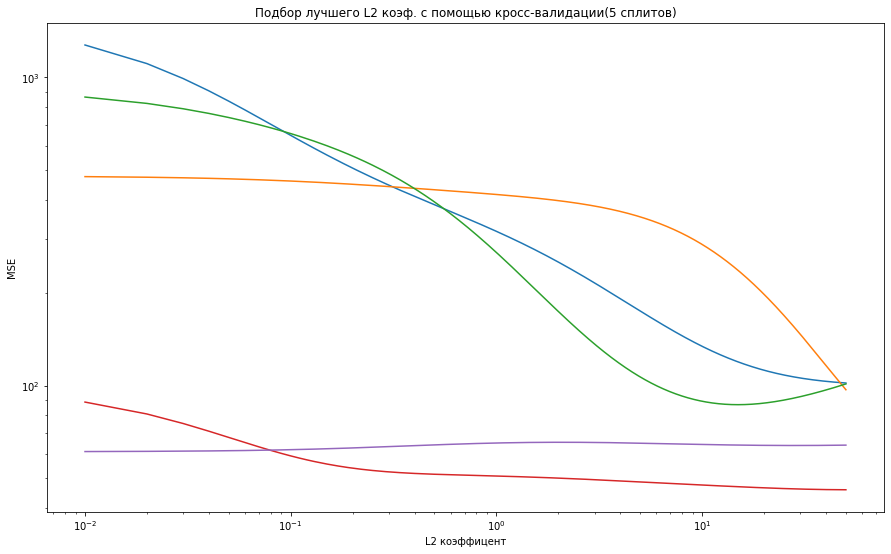

In [107]:
plt.figure(figsize=(15, 9))
steps = np.linspace(50, 0.01, 5000)
for elem in coefs_5splits:
    plt.plot(steps, elem)
plt.title('Подбор лучшего L2 коэф. с помощью кросс-валидации(5 сплитов)')
plt.ylabel('MSE')
plt.yscale('log')
plt.xlabel('L2 коэффицент')
plt.xscale('log')
plt.show()

In [113]:
kf = KFold(n_splits=7)
kf.get_n_splits(X)
coefs_7splits = []

for test_data, train_data in kf.split(X):
    X_test, X_train = X[test_data], X[train_data]
    y_test, y_train = y[test_data], y[train_data]
    
    coefs_7splits.append( calculate_MSE_errors(X_train, X_test, y_train, y_test) )

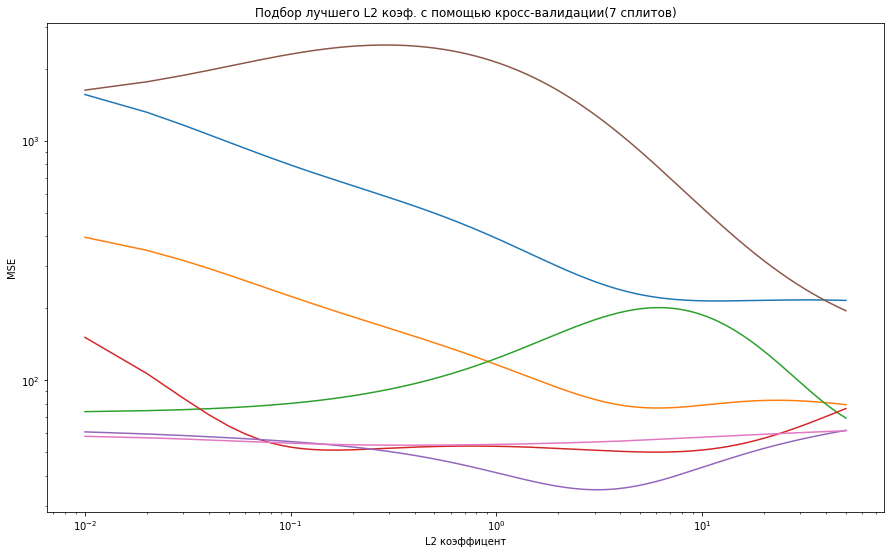

In [114]:
plt.figure(figsize=(15, 9))
steps = np.linspace(50, 0.01, 5000)
for elem in coefs_7splits:
    plt.plot(steps, elem)
plt.title('Подбор лучшего L2 коэф. с помощью кросс-валидации(7 сплитов)')
plt.ylabel('MSE')
plt.yscale('log')
plt.xlabel('L2 коэффицент')
plt.xscale('log')
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация помогает снизить ошибку в целом, в каких-то примерах очень значительно(примерно в 7 раз). Минимальная ошибка достигается при значении коэффицента около 45. При этом MSE равняется в среднем 100, в зависимости от выборки. Из этого следует вывод, что коэффицент следует подбирать с помощью кросс-валидации, иначе могут быть сделаны ошибочные выводы из-за особенностей выборки(как, например, график зависимость MSE от коэффицента выше, согласно которому лучший коэффицент - 0.01). Чем больше кол-во сплитов, тем более объективной будет оценка, но тем дольше будет происходить обучение. Я выбрал оптимальным значением 7 сплитов